In [80]:
import sys
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib.pyplot as plt
import numpy as np
import ot
import time
import numba as nb
from celluloid import Camera
from IPython.display import HTML
os.chdir(os.getcwd())
from sopt.library import *
from sopt.lib_shape import *
from sopt.lib_ot import *   
from sopt.sliced_opt import *   

In [81]:
vis_param_list={'stanford_bunny':
            ([-.1,.1],[-.1,.1],[-.1,.1],(90,-90,'z'),(0.02,-0.1,0)),
'dragon':
            ([-.1,.1],[-.1,.1],[-0.1,0.1],(90,-90,'z'),(0,-0.1,0)),
'mumble_sitting':
            ([-36,36],[-36,36],[-36,36],(-20,10,'y'),(10,-10,-10)),
'witchcastle':
            ([-20,20],[-20,20],[-20,20],(45,120,'z'),(-10,20,20)),
           }    


vis_param_list0={'stanford_bunny':
            ([-.2,.2],[-.2,.2],[-.2,.2],(90,-90,'z'),(0.02,-0.1,0)),
'dragon':
            ([-.2,.2],[-.2,.2],[-0.2,0.2],(90,-90,'z'),(0,-0.1,0)),
'mumble_sitting':
            ([-66,66],[-66,66],[-66,66],(-20,10,'y'),(10,0,-10)),
'witchcastle':
            ([-38,38],[-38,38],[-38,38],(45,120,'z'),(-10,20,20)),
           }  


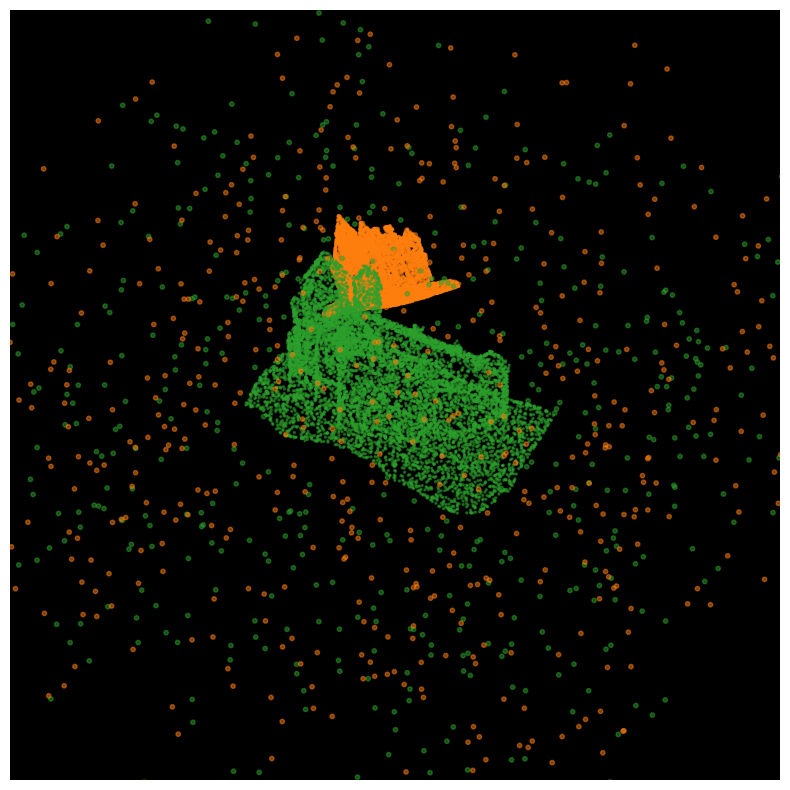

In [88]:
# plot the data
item_list=['stanford_bunny','dragon','mumble_sitting','witchcastle']
num=3 # other choices 0,1,2
item=item_list[num]
n_point_list=['10k','9k']
eta_list=['5p','7p']
time_list={}
(n_point,noise_p) =('10k','5p') # other choices ('10k','-7p'), ('9k','-5p'), ('9k','-7p')

data_path='experiment/shape_registration/data/orig/saved_3/'
result_path='experiment/shape_registration/result/'+item+'/'+n_point+'-'+noise_p
data=torch.load(data_path+item+'.pt')

#load the running time list
try:
    time_list32=torch.load('experiment/shape_registration/result/time_list32.pt')
except:
    time_list32={}
    torch.save(time_list,'experiment/shape_registration/result/time_list32.pt')
#time_list32={}
#plot the data 
image_path='experiment/shape_registration/result'+item+'/'+n_point+'-'+noise_p


T0=data['T'] #
S0=data['S-'+n_point] #
T1=data['T-'+noise_p] #
S1=data['S-'+n_point+'-'+noise_p] #
T=T1 #.copy()
S=S1 #.copy()
n=T1.shape[0]
data_indices_T=range(0,10000)
noise_indices_T=range(10000,n)
data_indices_S,noise_indices_S=get_noise_index(S0,S1)

T_data=T1[data_indices_T]
T_noise=T1[noise_indices_T]

S_data=S1[data_indices_S]
S_noise=S1[noise_indices_S]
name=result_path+'/init'
shape_image(T_data=T_data,S_data=S_data,T_noise=T_noise,S_noise=S_noise,name=name,param=vis_param_list0[item])


In [84]:
item_list=['stanford_bunny','dragon','mumble_sitting','witchcastle']
for item in item_list:
    data=torch.load(data_path+item+'.pt')
    data2=data.copy()
    for key in data:
        if 'T0' in key:
            key2=key.replace('T0','T')
            data2[key2] = data2.pop(key).numpy()
        if 'T1' in key:
            key2=key.replace('T1','T')
            data2[key2] = data2.pop(key).numpy()
        if 'S00' in key:
            key2=key.replace('S00','S-10k')
            data2[key2] = data2.pop(key).numpy()
        if 'S01' in key:
            key2=key.replace('S01','S-9k')
            data2[key2] = data2.pop(key).numpy()
        if 'S10' in key:
            key2=key.replace('S10','S-10k')
            data2[key2] = data2.pop(key).numpy()
        if 'S11' in key:
            key2=key.replace('S11','S-9k')
            data2[key2] = data2.pop(key).numpy()
    data2['param']['theta']=data['param']['theta'].numpy()
    data2['param']['beta']=data['param']['beta'].numpy()
    data2['param']['rotation_op']=data['param']['rotation_op'].numpy()
    data2['param']['beta_op']=data['param']['beta_op'].numpy()
    #del data2['S02']
    torch.save(data2,'experiment/shape_registration/data/orig/saved_3/'+item+'.pt')
    

In [83]:
data

{'param': {'theta': array([ 0.7853982 , -0.62831855, -0.62831855], dtype=float32),
  'beta': array([-0.04,  0.03,  0.02], dtype=float32),
  'scalar': 0.6,
  'rotation_op': array([[ 0.65450853, -0.47552827,  0.58778524],
         [ 0.07937768,  0.8163608 ,  0.5720614 ],
         [-0.7518761 , -0.32776207,  0.5720614 ]], dtype=float32),
  'scalar_op': 1.6666666666666667,
  'beta_op': array([ 0.06472755, -0.06159451, -0.0084861 ], dtype=float32)},
 'T0': tensor([[-5.3497e-02,  8.7617e-02,  4.5276e-02],
         [ 1.2283e-02,  1.2339e-01, -8.9862e-03],
         [-4.2131e-02,  1.2808e-01, -3.6221e-05],
         ...,
         [-8.6132e-02,  1.0353e-01,  4.4020e-03],
         [-2.6722e-02,  3.8665e-02, -1.6293e-02],
         [-3.4502e-02,  4.6172e-02, -2.5465e-02]]),
 'S00': tensor([[-0.0700,  0.0859,  0.0424],
         [-0.0736,  0.0879, -0.0129],
         [-0.0931,  0.0907,  0.0138],
         ...,
         [-0.1018,  0.0781,  0.0400],
         [-0.0673,  0.0421,  0.0189],
         [-0.0757,

In [ ]:
#our method
#load the data 

method='sopt'
T0=data['T']
S0=data['S-'+n_point]
T1=data['T-'+noise_p]
S1=data['S-'+n_point+'-'+noise_p]
print('sopt')

T=T1.copy()
S=S1.copy()
N0=S0.shape[0]
start_time=time.time()
n_iterations=30
rotation_list,scalar_list,beta_list =sopt_main_32(S,T,n_iterations,N0)
end_time=time.time()
wall_time=end_time-start_time
result={}
result['wall_time']=wall_time
result['n_iterations']=n_iterations
result['time_per_iteration']=wall_time/n_iterations

time_list32[method+'-'+item+'-'+n_point+'-'+noise_p]=result
print('noise_p',wall_time/n_iterations)
print('end')
torch.save(time_list32,'experiment/shape_registration/result/time_list32.pt')
paramlist=save_parameter(rotation_list,scalar_list,beta_list,'experiment/shape_registration/result/'+item+'/'+n_point+'-'+noise_p+'/sopt_param.pt')

method sopt


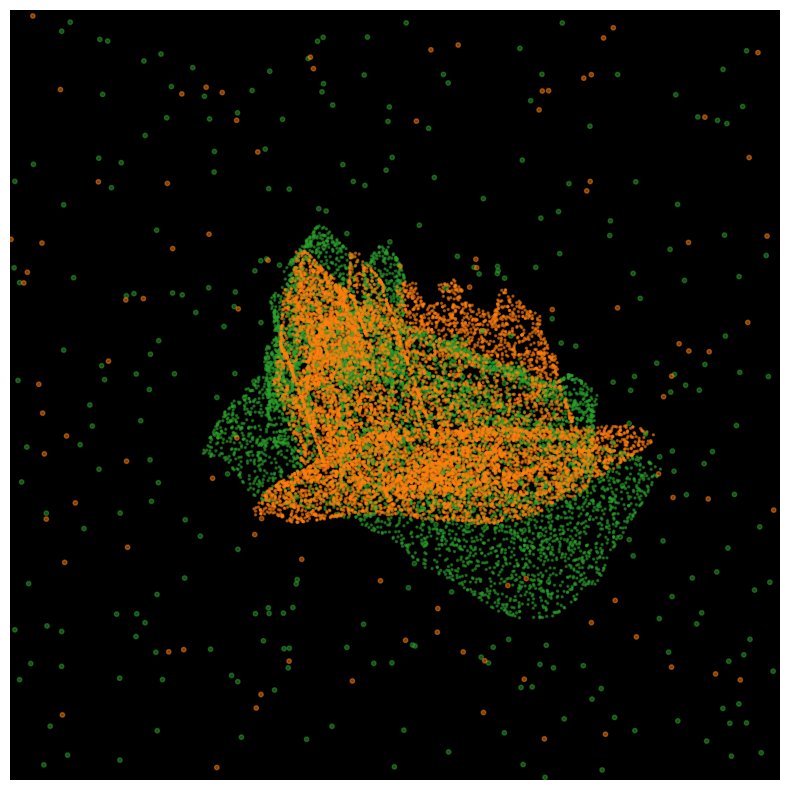

In [109]:
#visualize the result
time_list32=torch.load('experiment/shape_registration/result/time_list32.pt')
method='sopt'
print('method',method)

T0=data['T']
S0=data['S-'+n_point]
T1=data['T-'+noise_p]
S1=data['S-'+n_point+'-'+noise_p]

T=T1.copy()
S=S1.copy()
n=T1.shape[0]
data_indices_T=range(0,10000)
noise_indices_T=range(10000,n)
data_indices_S,noise_indices_S=get_noise_index(S0,S1)

T_data=T1[data_indices_T]
T_noise=T1[noise_indices_T]

S_data=S1[data_indices_S]
S_noise=S1[noise_indices_S]

# load parameter: 
time_per_iteration=time_list32[method+'-'+item+'-'+n_point+'-'+noise_p]['time_per_iteration']
paramlist=torch.load(result_path+'/'+method+'_param.pt')
N=len(paramlist)
k_list=[]
for k in range(5):
    index=k*60/time_per_iteration
    if index<N:
        k_list.append(int(k*60/time_per_iteration))
k_list.append(N-1)

for k in k_list:
    param=paramlist[k]
    rotation=param['rotation']
    beta=param['beta']
    scalar=param['scalar']
    T_hat=S1@rotation*scalar+beta
    T_hat_data=T_hat[data_indices_S]
    T_hat_noise=T_hat[noise_indices_S]
    name='experiment/shape_registration/result/'+item+'/'+n_point+'-'+noise_p+'/'+method+'/'+str(k)
    shape_image(T_data,T_hat_data,T_noise,T_hat_noise,name,vis_param_list[item])

In [110]:
# SPOT Boneel 
#load the data 
time_dict={}
method='spot'
T0=data['T']
S0=data['S-'+n_point]
T1=data['T-'+noise_p]
S1=data['S-'+n_point+'-'+noise_p]
print('spot')

T=T1.copy()
S=S1.copy()
N0=S0.shape[0]
n_projections=3
n_iterations=5
start_time=time.time()
rotation_list,scalar_list,beta_list =spot_bonneel_32(S,T,n_projections,n_iterations)
end_time=time.time()
wall_time=end_time-start_time
result={}
result['wall_time']=wall_time
result['n_iterations']=n_iterations
result['time_per_iteration']=wall_time/n_iterations

time_list32[method+'-'+item+'-'+n_point+'-'+noise_p]=result
print('noise_p',wall_time/n_iterations)
print('end')
torch.save(time_list32,'experiment/shape_registration/result/time_list32.pt')
save_parameter(rotation_list,scalar_list,beta_list,result_path+method+'_param.pt')

spot
noise_p 2.714635705947876
end


noise_p 5p
method spot


<Figure size 500x500 with 0 Axes>

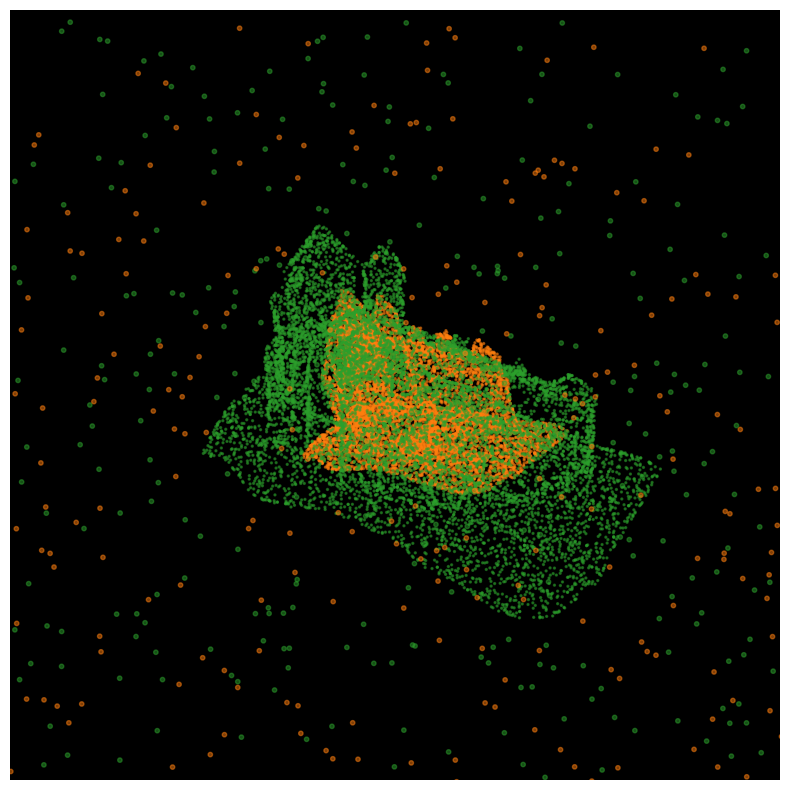

In [111]:
#visualize the result 
time_list32=torch.load('experiment/shape_registration/result/time_list32.pt')
method='spot'

print('noise_p',noise_p)
print('method',method)
T0=data['T']
S0=data['S-'+n_point]
T1=data['T-'+noise_p]
S1=data['S-'+n_point+'-'+noise_p]
T=T1.copy()
S=S1.copy()
n=T1.shape[0]
data_indices_T=range(0,10000)
noise_indices_T=range(10000,n)
data_indices_S,noise_indices_S=get_noise_index(S0,S1)

T_data=T1[data_indices_T]
T_noise=T1[noise_indices_T]

S_data=S1[data_indices_S]
S_noise=S1[noise_indices_S]



# load parameter: 
time_per_iteration=time_list32[method+'-'+item+'-'+n_point+'-'+noise_p]['time_per_iteration']
paramlist=torch.load(result_path+method+'_param.pt')
N=len(paramlist)
k_list=[]
for k in range(5):
    index=k*60/time_per_iteration
    if index<N:
        k_list.append(int(k*60/time_per_iteration))
k_list.append(N-1)

for k in k_list:
    param=paramlist[k]
    rotation=param['rotation']
    beta=param['beta']
    scalar=param['scalar']
    T_hat=S1@rotation*scalar+beta
    T_hat_data=T_hat[data_indices_S]
    T_hat_noise=T_hat[noise_indices_S]
    fig = plt.figure(figsize=(5,5))
    camera = Camera(fig)
    name='experiment/shape_registration/result/'+item+'/'+n_point+'-'+noise_p+'/'+method+'/'+str(k)
    shape_image(T_data,T_hat_data,T_noise,T_hat_noise,name,vis_param_list[item])

In [115]:
# icp-du
#load the data 
method='icp-du'
time_dict={}

T0=data['T']
S0=data['S-'+n_point]
T1=data['T-'+noise_p]
S1=data['S-'+n_point+'-'+noise_p]
print('icp-du')

T=T1.copy()
S=S1.copy()
N0=S0.shape[0]
#n_projections=20
n_iterations=30
start_time=time.time()
rotation_list,scalar_list,beta_list =icp_du_32(S,T,n_iterations)
end_time=time.time()
wall_time=end_time-start_time
result={}
result['wall_time']=wall_time
result['n_iterations']=n_iterations
result['time_per_iteration']=wall_time/n_iterations

time_list32[method+'-'+item+'-'+n_point+'-'+noise_p]=result
print('noise_p',wall_time/n_iterations)
print('end')
torch.save(time_list32,'experiment/shape_registration/result/time_list32.pt')
save_parameter(rotation_list,scalar_list,beta_list,result_path+method+'_param.pt')


icp-du
noise_p 0.9882774194081624
end


experiment/shape_registration/resultwitchcastle/10k-5picp-du
noise_p 5p
method icp-du


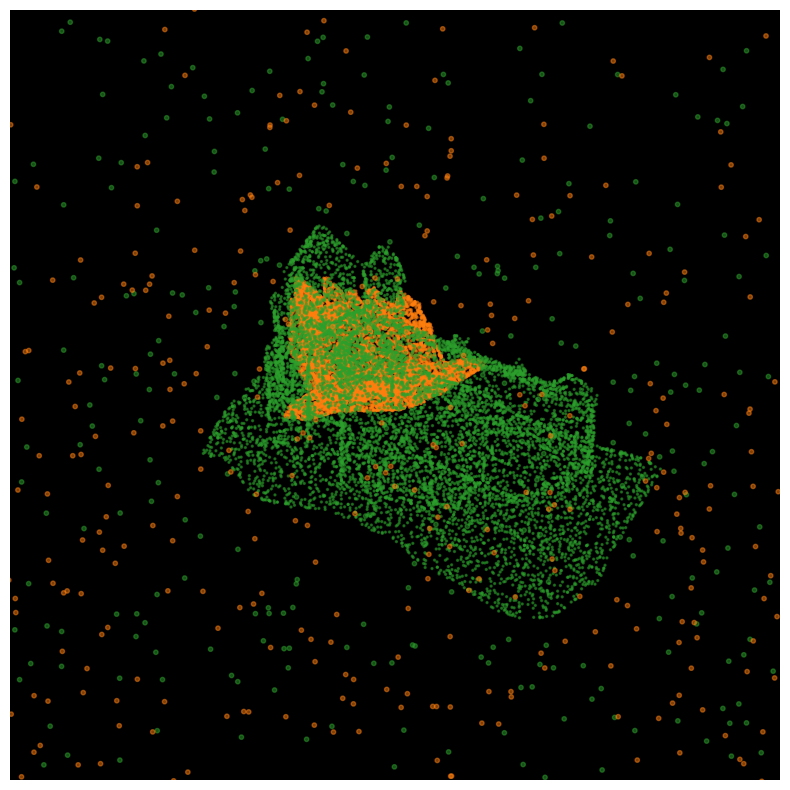

In [120]:
#visualize the result 
method='icp-du'
time_list32=torch.load('experiment/shape_registration/result/time_list32.pt')

image_path='experiment/shape_registration/result'+item+'/'+n_point+'-'+noise_p+method
print(image_path)
print('noise_p',noise_p)
print('method',method)
T0=data['T']
S0=data['S-'+n_point]
T1=data['T-'+noise_p]
S1=data['S-'+n_point+'-'+noise_p]
T=T1.copy()
S=S1.copy()
n=T1.shape[0]
data_indices_T=range(0,10000)
noise_indices_T=range(10000,n)
data_indices_S,noise_indices_S=get_noise_index(S0,S1)

T_data=T1[data_indices_T]
T_noise=T1[noise_indices_T]

S_data=S1[data_indices_S]
S_noise=S1[noise_indices_S]


# load parameter: 
time_per_iteration=time_list32[method+'-'+item+'-'+n_point+'-'+noise_p]['time_per_iteration']
paramlist=torch.load(result_path+method+'_param.pt')
N=len(paramlist)
k_list=[]
for k in range(5):
    index=k*60/time_per_iteration
    if index<N:
        k_list.append(int(k*60/time_per_iteration))
k_list.append(N-1)

for k in k_list:
    param=paramlist[k]
    rotation=param['rotation']
    beta=param['beta']
    scalar=param['scalar']
    T_hat=S1@rotation*scalar+beta
    T_hat_data=T_hat[data_indices_S]
    T_hat_noise=T_hat[noise_indices_S]
    name='experiment/shape_registration/result/'+item+'/'+n_point+'-'+noise_p+'/'+method+'/'+str(k)
    shape_image(T_data,T_hat_data,T_noise,T_hat_noise,name,vis_param_list[item])

In [128]:
# icp-umeyama
#load the data 
method='icp-umeyama'
time_dict={}

T0=data['T']
S0=data['S-'+n_point]
T1=data['T-'+noise_p]
S1=data['S-'+n_point+'-'+noise_p]
print('icp-umeyama')

T=T1.copy()
S=S1.copy()
N0=S0.shape[0]
#n_projections=20
n_iterations=10
start_time=time.time()
rotation_list,scalar_list,beta_list =icp_du_32(S,T,n_iterations)
end_time=time.time()
wall_time=end_time-start_time
result={}
result['wall_time']=wall_time
result['n_iterations']=n_iterations
result['time_per_iteration']=wall_time/n_iterations

time_list32[method+'-'+item+'-'+n_point+'-'+noise_p]=result
print('noise_p',wall_time/n_iterations)
print('end')
torch.save(time_list32,'experiment/shape_registration/result/time_list32.pt')
save_parameter(rotation_list,scalar_list,beta_list,result_path+method+'_param.pt')


icp-umeyama
noise_p 0.9449903249740601
end


experiment/shape_registration/resultwitchcastle/10k-5picp-umeyama
noise_p 5p
method icp-umeyama


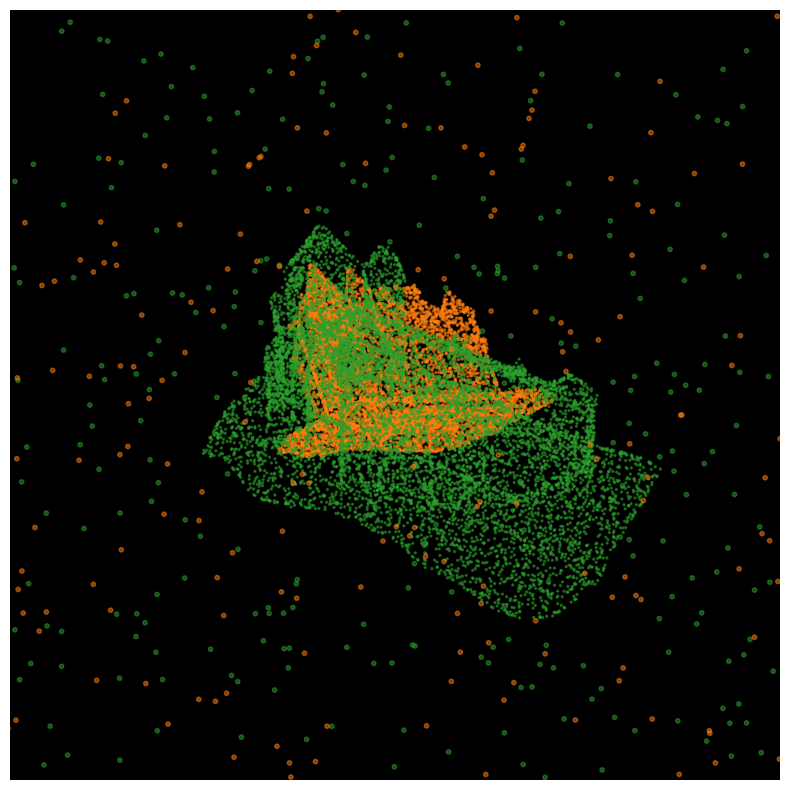

In [132]:
#visualize the result 
method='icp-umeyama'
time_list32=torch.load('experiment/shape_registration/result/time_list32.pt')

image_path='experiment/shape_registration/result'+item+'/'+n_point+'-'+noise_p+method
print(image_path)
print('noise_p',noise_p)
print('method',method)
T0=data['T']
S0=data['S-'+n_point]
T1=data['T-'+noise_p]
S1=data['S-'+n_point+'-'+noise_p]
T=T1.copy()
S=S1.copy()
n=T1.shape[0]
data_indices_T=range(0,10000)
noise_indices_T=range(10000,n)
data_indices_S,noise_indices_S=get_noise_index(S0,S1)

T_data=T1[data_indices_T]
T_noise=T1[noise_indices_T]

S_data=S1[data_indices_S]
S_noise=S1[noise_indices_S]



# load parameter: 
time_per_iteration=time_list32[method+'-'+item+'-'+n_point+'-'+noise_p]['time_per_iteration']
paramlist=torch.load(result_path+method+'_param.pt')
N=len(paramlist)
k_list=[]
for k in range(5):
    index=k*60/time_per_iteration
    if index<N:
        k_list.append(int(k*60/time_per_iteration))
k_list.append(N-1)

for k in k_list:
    param=paramlist[k]
    rotation=param['rotation']
    beta=param['beta']
    scalar=param['scalar']
    T_hat=S1@rotation*scalar+beta
    T_hat_data=T_hat[data_indices_S]
    T_hat_noise=T_hat[noise_indices_S]
    name='experiment/shape_registration/result/'+item+'/'+n_point+'-'+noise_p+'/'+method+'/'+str(k)
    shape_image(T_data,T_hat_data,T_noise,T_hat_noise,name,vis_param_list[item])